In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
  
from keras.layers import * 
from keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import sys
sys.path.append('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/')
from models import CustomModels

Mounted at /gdrive


## Loading the dataset

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
_ = tf.compat.v1.Session(config=config)

# Load the encoded protein sequences, labels and masks
# The masks are not needed for the FFN or CNN models
train = np.load('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/data/reduced_train.npz')
X_train = train['X_train']
y_train = train['y_train']
mask_train = train['mask_train']
#print(X_train.shape)
#print(X_train)

validation = np.load('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/data/reduced_val.npz')
X_val = validation['X_val']
y_val = validation['y_val']
mask_val = validation['mask_val']


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



##Creating the models

### Feed-Forward Network (FFN)

In [ ]:
# Set the hyperparameters of the network:
batch_size = 128
seq_len = 400
n_feat = 20
n_class=10
# hyperparameters values found with bayesian optimization
n_hid = 10
lr = 0.0001
drop_prob = 0.5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                240030    
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 240,340
Trainable params: 240,340
Non-trainable params: 0
_________________________________________________________________


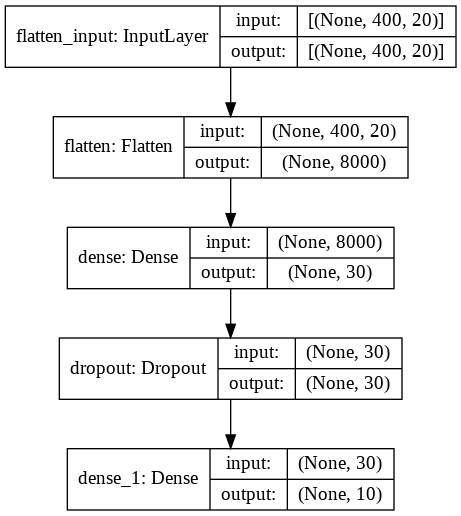

In [ ]:
# Create the instance of the model
FFN = CustomModels(seq_len=seq_len, n_feat=n_feat, n_hid=n_hid, n_class=n_class, lr=lr, drop_prob=drop_prob)
FFN.create_FFN()

# Display the model's architecture
FFN.model.summary()
keras.utils.plot_model(FFN.model, "model.png", show_shapes=True)

### Convolutional Neural Network (CNN)

In [ ]:
# Set hyperparameters
batch_size = 128
seq_len = 400
n_feat = 20
n_class = 10
# hyperparameters values found with bayesian optimization
n_hid = 10
lr = 0.0031
n_filt = 3
drop_prob = 0.7

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 20)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 20, 400)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10, 400)      610         permute[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 10, 400)      1010        permute[0][0]                    
______________________________________________________________________________________________

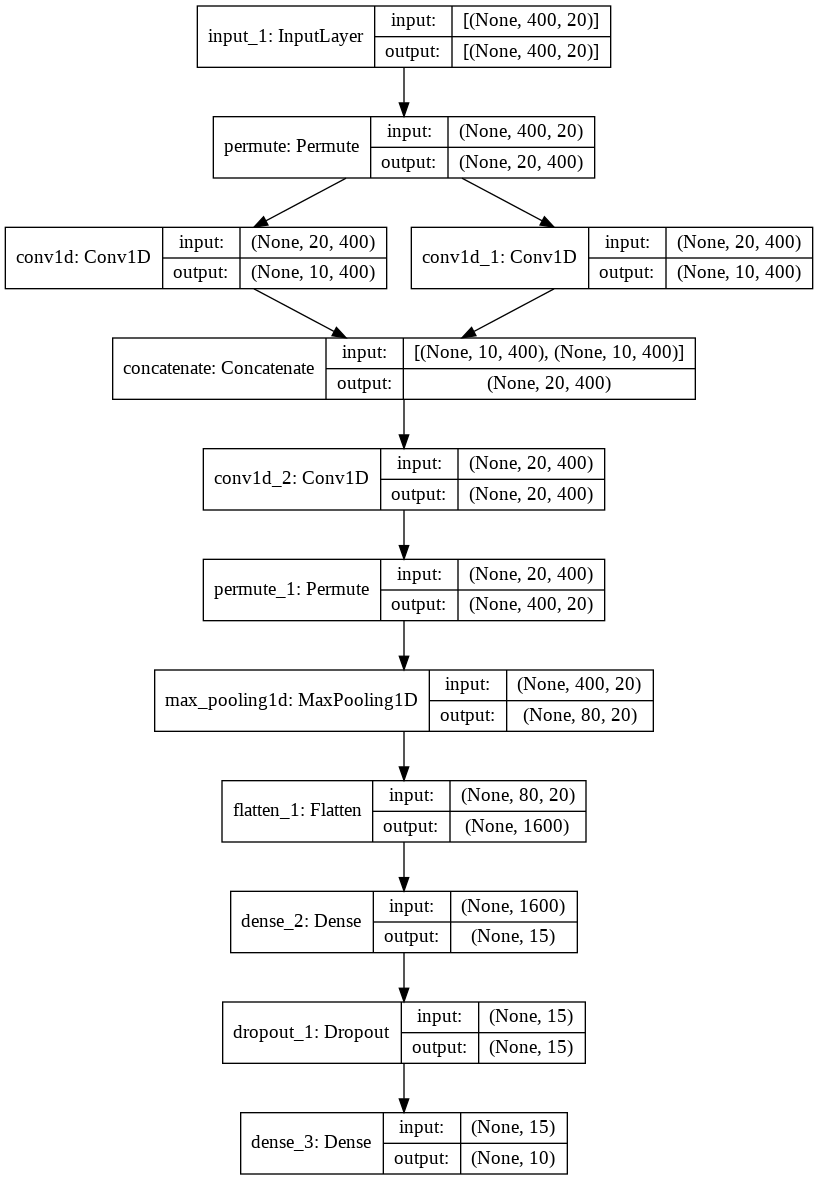

In [ ]:
# Create the instance of the model
CNN = CustomModels(seq_len, n_feat, n_hid, n_class, lr, drop_prob, n_filt)
CNN.create_CNN()

# Display the model's architecture
CNN.model.summary()
keras.utils.plot_model(CNN.model, "model.png", show_shapes=True)

###Long Short Term Memory network (LSTM)

In [ ]:
# Set hyperparameters
batch_size = 128
seq_len = 400
n_feat = 20
n_class = 10
# hyperparameters values found with bayesian optimization
n_hid = 40
lr = 0.0011
drop_prob = 0.7

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 400, 20)]    0                                            
__________________________________________________________________________________________________
masking (Masking)               (None, 400, 20)      0           input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 15)           2160        masking[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 15)           2160        masking[0][0]                    
____________________________________________________________________________________________

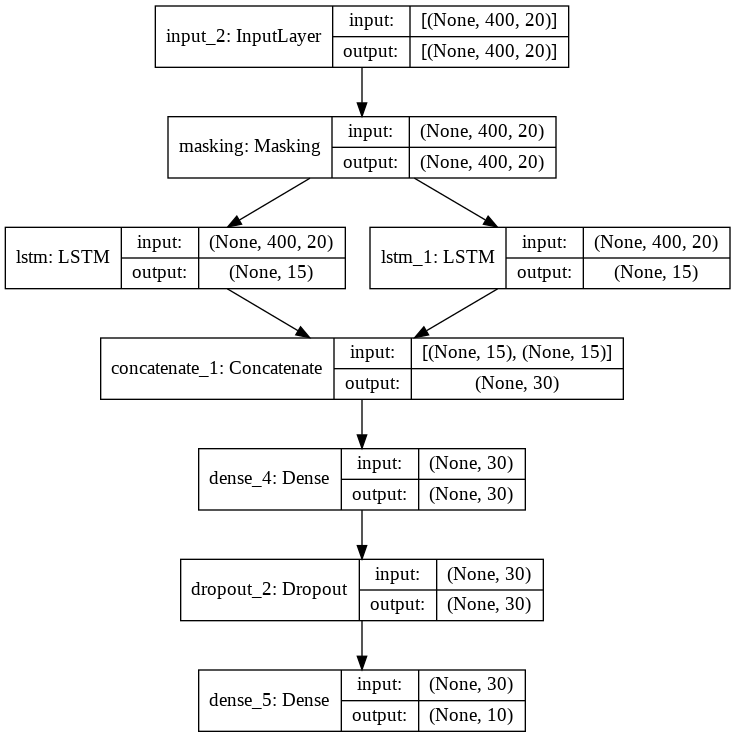

In [ ]:
# Create the instance of the model
LSTM = CustomModels(seq_len, n_feat, n_hid, n_class, lr, drop_prob)
LSTM.create_LSTM()

# Display the model's architecture
LSTM.model.summary()
keras.utils.plot_model(LSTM.model, "model.png", show_shapes=True)


### Convolutional Neural Network with Long Short Term Memory (CNN + LSTM) 

In [ ]:
# Set hyperparameters
batch_size = 128
seq_len = 400
n_feat = 20
n_hid = 15
n_class = 10
lr = 0.0025
n_filt = 10
drop_prob = 0.5

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 400, 20)]    0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 20, 400)      0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 10, 400)      610         permute_2[0][0]                  
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 10, 400)      1010        permute_2[0][0]                  
____________________________________________________________________________________________

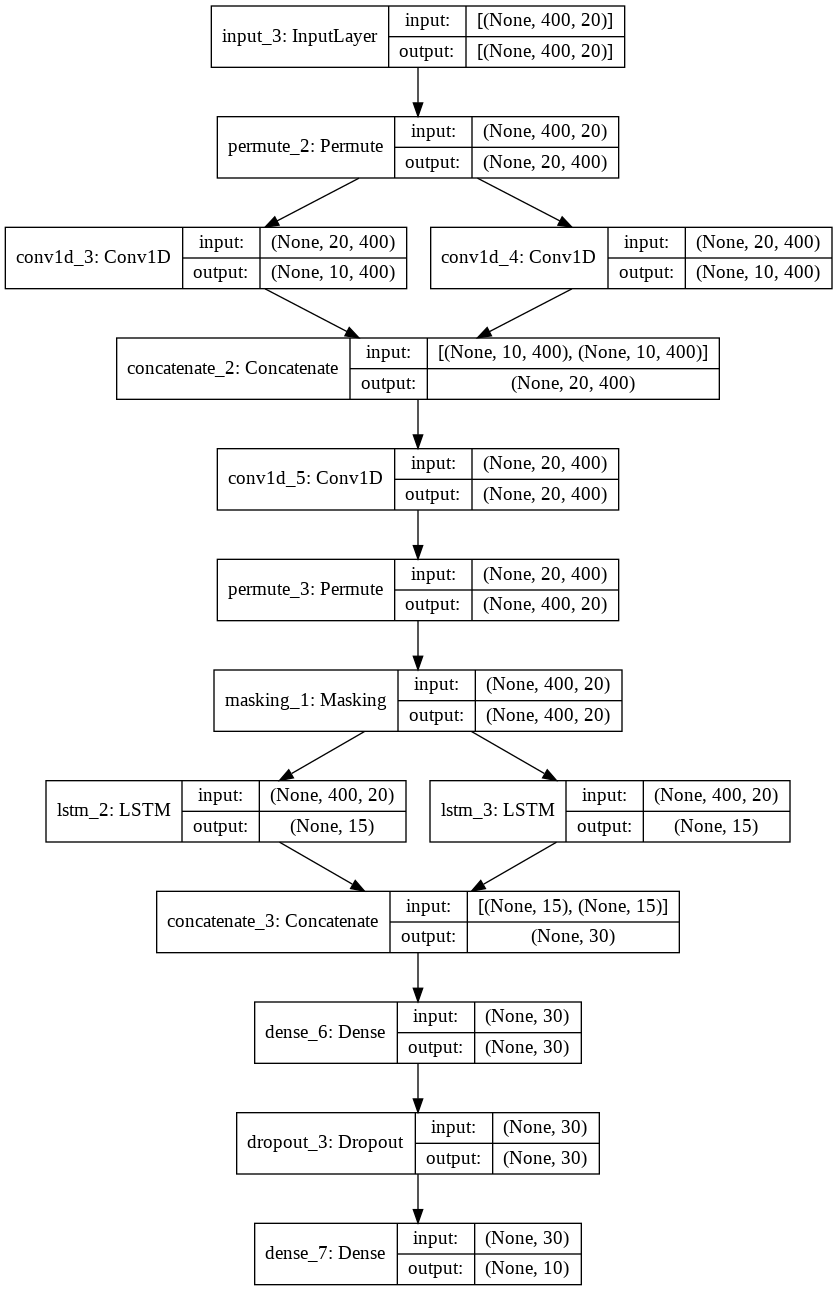

In [ ]:
# Create the instance of the model
CNN_LSTM = CustomModels(seq_len, n_feat, n_hid, n_class, lr, drop_prob, n_filt)
CNN_LSTM.create_CNN_LSTM()

# Display the model's architecture
CNN_LSTM.model.summary()
keras.utils.plot_model(CNN_LSTM.model, "model.png", show_shapes=True)

### Network with LSTM and Bahdanau Attention layer (LSTM + Attention)

In [ ]:
# Set hyperparameters
batch_size = 128
seq_len = 400
n_feat = 20
n_hid = 15
n_class = 10
lr = 0.0025
n_filt = 10
drop_prob = 0.5

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 400, 20)]    0                                            
__________________________________________________________________________________________________
masking_2 (Masking)             (None, 400, 20)      0           input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 400, 30), (N 4320        masking_2[0][0]                  
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 30)           0           bidirectional[0][1]              
                                                                 bidirectional[0][3]        

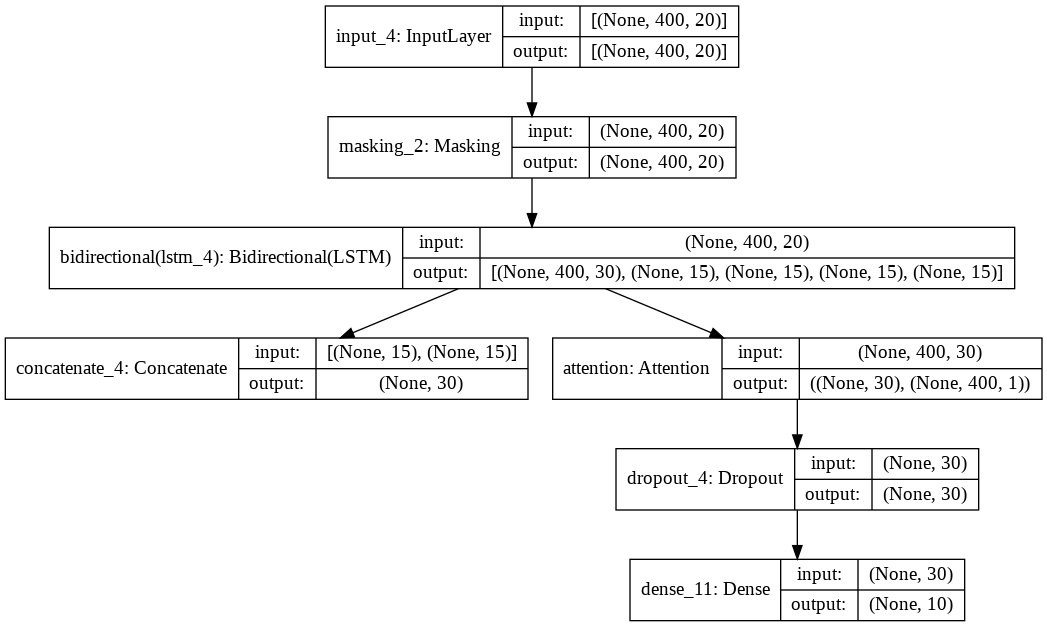

In [ ]:
# Create the instance of the model
LSTM_Attention = CustomModels(seq_len, n_feat, n_hid, n_class, lr, drop_prob, n_filt)
LSTM_Attention.create_LSTM_Attention()

# Display the model's architecture
LSTM_Attention.model.summary()
keras.utils.plot_model(LSTM_Attention.model, "model.png", show_shapes=True)

### Convolutional Neural Network with LSTM and Bahdanau Attention layer (CNN + LSTM + Attention)

In [ ]:
# Set hyperparameters
batch_size = 128
seq_len = 400
n_feat = 20
n_hid = 15
n_class = 10
lr = 0.0025
n_filt = 10
drop_prob = 0.5

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 400, 20)]    0                                            
__________________________________________________________________________________________________
masking_3 (Masking)             (None, 400, 20)      0           input_5[0][0]                    
__________________________________________________________________________________________________
permute_4 (Permute)             (None, 20, 400)      0           masking_3[0][0]                  
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 10, 400)      610         permute_4[0][0]                  
____________________________________________________________________________________________

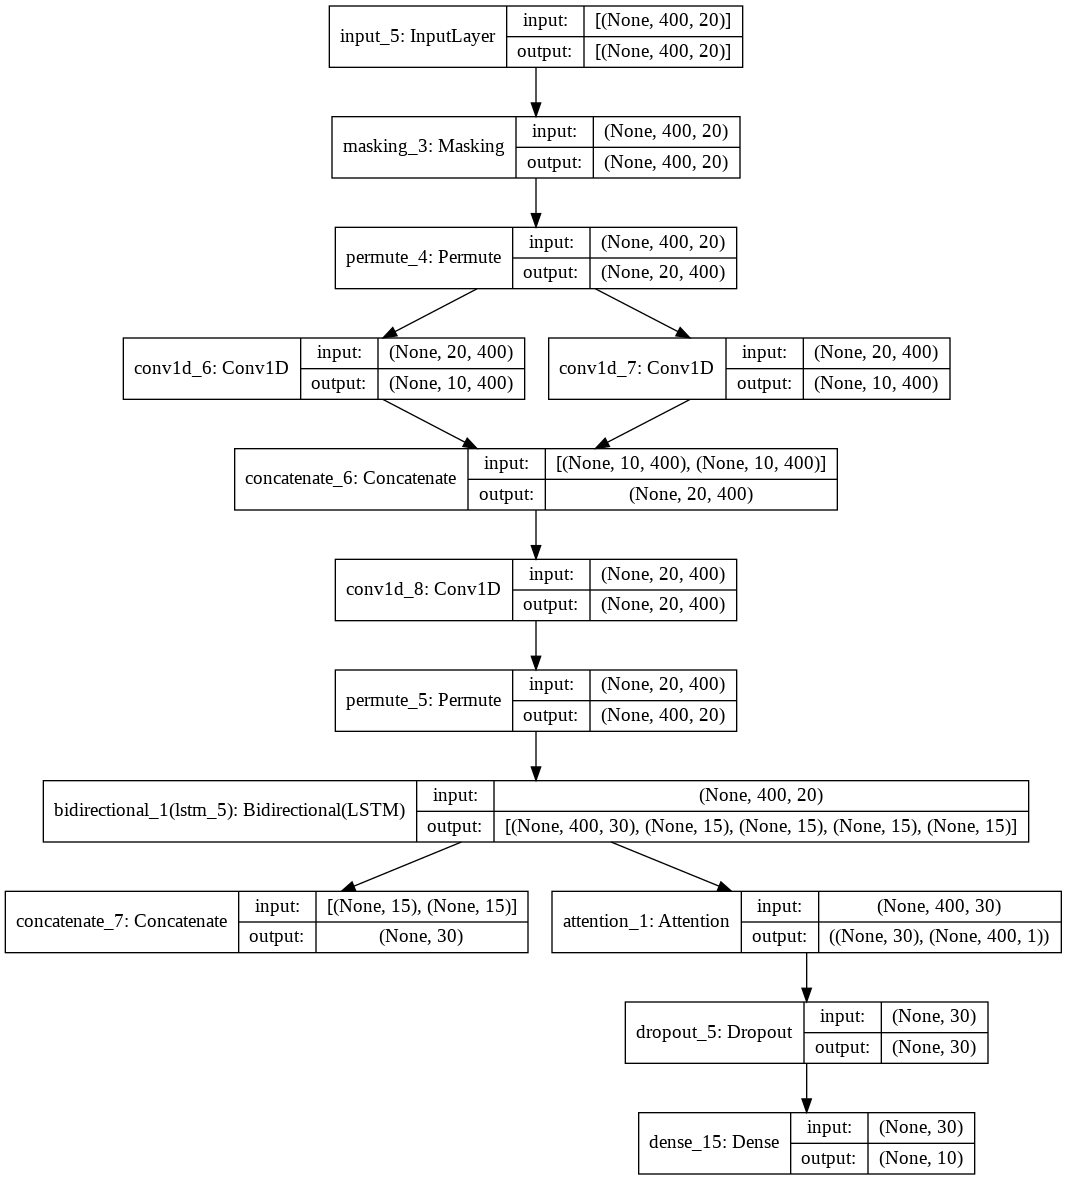

In [ ]:
# Create the instance of the model
CNN_LSTM_Attention = CustomModels(seq_len, n_feat, n_hid, n_class, lr, drop_prob, n_filt)
CNN_LSTM_Attention.create_CNN_LSTM_Attention()

# Display the model's architecture
CNN_LSTM_Attention.model.summary()
keras.utils.plot_model(CNN_LSTM_Attention.model, "model.png", show_shapes=True)

## Training

In [ ]:
y_train = to_categorical(y_train, n_class)
y_val = to_categorical(y_val, n_class)

###FFN

In [ ]:
# Number of epochs
num_epochs = 80

checkpoint = ModelCheckpoint(filepath='/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/FFN_weights',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='min')

# Calculate also the prediction and network loss for the validation set:
FFN_history = FFN.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, callbacks=[checkpoint])


Epoch 1/80
19/19 [==============================] - 4s 27ms/step - loss: 2.1288 - accuracy: 0.2200 - val_loss: 1.6817 - val_accuracy: 0.4945

Epoch 00001: val_loss improved from inf to 1.68171, saving model to /gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/FFN_weights
Epoch 2/80
19/19 [==============================] - 0s 7ms/step - loss: 1.5969 - accuracy: 0.4487 - val_loss: 1.3533 - val_accuracy: 0.6315

Epoch 00002: val_loss improved from 1.68171 to 1.35334, saving model to /gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/FFN_weights
Epoch 3/80
19/19 [==============================] - 0s 7ms/step - loss: 1.2706 - accuracy: 0.6162 - val_loss: 1.1729 - val_accuracy: 0.6929

Epoch 00003: val_loss improved from 1.35334 to 1.17285, saving model to /gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/FFN_weights
Epoch 4/80
19/19 [==============================] - 0s 7ms/step - loss: 1.0115 - accuracy: 0.6841 - val_loss: 1.0498 - va

In [ ]:
loss_FFN=min(FFN_history.history['val_loss'])
print("Minimum validation loss: {:.6f}".format(loss_FFN))
acc_index = np.argmin(FFN_history.history['val_loss'])
accuracy_FFN = FFN_history.history['val_accuracy'][acc_index]
print("With accuracy: {:.6f}".format(accuracy_FFN))

Minimum validation loss: 0.798609
With accuracy: 0.759055


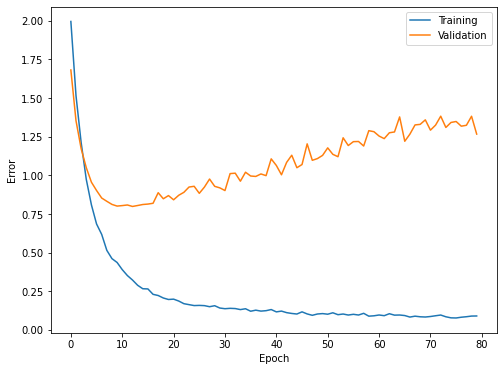

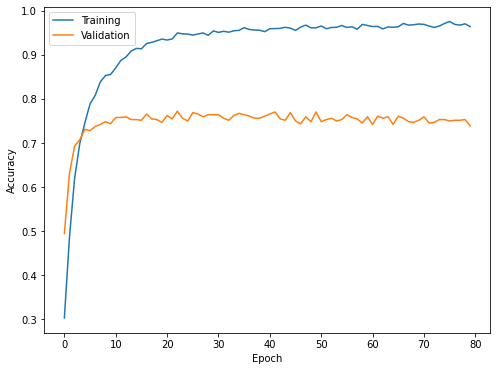

In [ ]:
# Model loss and accuracy
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, FFN_history.history['loss'])
# loss_validation
plt.plot(x_axis, FFN_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, FFN_history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, FFN_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

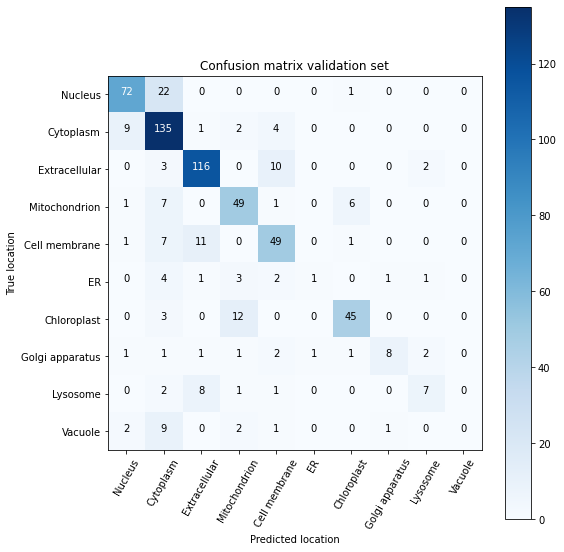

In [ ]:
# Confusion Matrix

# Create a new model instance
FFN.create_FFN()

# Load the previously saved weights (which are the best ones)
FFN.model.load_weights('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/FFN_weights')
FFN.confusion_matrix(X_val, validation)

### CNN

In [ ]:
# Number of epochs
num_epochs = 100

checkpoint = ModelCheckpoint(filepath='/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/CNN_weights',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='min')

# Calculate also the prediction and network loss for the validation set:
CNN_history = CNN.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, callbacks=[checkpoint])


Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
loss_CNN=min(CNN_history.history['val_loss'])
print("Minimum validation loss: {:.6f}".format(loss_CNN))
acc_index = np.argmin(CNN_history.history['val_loss'])
accuracy_CNN = CNN_history.history['val_accuracy'][acc_index]
print("With accuracy: {:.6f}".format(accuracy_CNN))

In [ ]:
# Model loss and accuracy
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, CNN_history.history['loss'])
# loss_validation
plt.plot(x_axis, CNN_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, CNN_history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, CNN_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

In [ ]:
# Confusion Matrix

# Create a new model instance
CNN.create_CNN()

# Load the previously saved weights (which are the best ones)
CNN.model.load_weights('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/CNN_weights')

CNN.confusion_matrix(X_val, validation)

###LSTM

In [ ]:
# Number of epochs
num_epochs = 100

checkpoint = ModelCheckpoint(filepath='/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/LSTM_weights',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='min')

# Calculate also the prediction and network loss for the validation set:
LSTM_history = LSTM.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, callbacks=[checkpoint])


In [ ]:
loss_LSTM=min(LSTM_history.history['val_loss'])
print("Minimum validation loss: {:.6f}".format(loss_LSTM))
acc_index = np.argmin(LSTM_history.history['val_loss'])
accuracy_LSTM = LSTM_history.history['val_accuracy'][acc_index]
print("With accuracy: {:.6f}".format(accuracy_LSTM))

In [ ]:
# Model loss and accuracy
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, LSTM_history.history['loss'])
# loss_validation
plt.plot(x_axis, LSTM_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, LSTM_history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, LSTM_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

In [ ]:
# Confusion Matrix

# Create a new model instance
LSTM.create_LSTM()

# Load the previously saved weights (which are the best ones)
LSTM.model.load_weights('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/LSTM_weights')

LSTM.confusion_matrix(X_val, validation)

### CNN + LSTM

In [ ]:
# Number of epochs
num_epochs = 120

checkpoint = ModelCheckpoint(filepath='/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/CNN_LSTM_weights',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='min')

# Calculate also the prediction and network loss for the validation set:
CNN_LSTM_history = CNN_LSTM.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, callbacks=[checkpoint])


In [ ]:
loss_CNN_LSTM=min(CNN_LSTM_history.history['val_loss'])
print("Minimum validation loss: {:.6f}".format(loss_CNN_LSTM))
acc_index = np.argmin(CNN_LSTM_history.history['val_loss'])
accuracy_CNN_LSTM = CNN_LSTM_history.history['val_accuracy'][acc_index]
print("With accuracy: {:.6f}".format(accuracy_CNN_LSTM))

In [ ]:
# Model loss and accuracy
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, CNN_LSTM_history.history['loss'])
# loss_validation
plt.plot(x_axis, CNN_LSTM_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, CNN_LSTM_history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, CNN_LSTM_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

In [ ]:
# Confusion Matrix
# Create a new model instance
CNN_LSTM.create_CNN_LSTM()

# Load the previously saved weights (which are the best ones)
CNN_LSTM.model.load_weights('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/CNN_LSTM_weights')
CNN_LSTM.confusion_matrix(X_val, validation)

###LSTM + Attention layer

In [ ]:
# Number of epochs
num_epochs = 120

checkpoint = ModelCheckpoint(filepath='/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/LSTM_Attention_weights',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='min')

# Calculate also the prediction and network loss for the validation set:
LSTM_Attention_history = LSTM_Attention.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, callbacks=[checkpoint])


In [ ]:
loss_LSTM_Attention=min(LSTM_Attention_history.history['val_loss'])
print("Minimum validation loss: {:.6f}".format(loss_LSTM_Attention))
acc_index = np.argmin(LSTM_Attention_history.history['val_loss'])
accuracy_LSTM_Attention = LSTM_Attention_history.history['val_accuracy'][acc_index]
print("With accuracy: {:.6f}".format(accuracy_LSTM_Attention))

In [ ]:
# Model loss and accuracy
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, LSTM_Attention_history.history['loss'])
# loss_validation
plt.plot(x_axis, LSTM_Attention_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, LSTM_Attention_history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, LSTM_Attention_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

In [ ]:
# Confusion Matrix
# Create a new model instance
LSTM_Attention.create_LSTM_Attention()

# Load the previously saved weights (which are the best ones)
LSTM_Attention.model.load_weights('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/LSTM_Attention_weights')
LSTM_Attention.confusion_matrix(X_val, validation)

### CNN + LSTM + Attention layer

In [ ]:
# Number of epochs
num_epochs = 120

checkpoint = ModelCheckpoint(filepath='/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/CNN_LSTM_Attention_weights',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='min')

# Calculate also the prediction and network loss for the validation set:
CNN_LSTM_Attention_history = CNN_LSTM_Attention.model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), shuffle=True, callbacks=[checkpoint])


In [ ]:
loss_CNN_LSTM_Attention=min(CNN_LSTM_Attention_history.history['val_loss'])
print("Minimum validation loss: {:.6f}".format(loss_CNN_LSTM_Attention))
acc_index = np.argmin(CNN_LSTM_Attention_history.history['val_loss'])
accuracy_CNN_LSTM_Attention = CNN_LSTM_Attention_history.history['val_accuracy'][acc_index]
print("With accuracy: {:.6f}".format(accuracy_CNN_LSTM_Attention))

In [ ]:
# Model loss and accuracy
# Plots of loss and accuracy for training and validation set at each epoch
x_axis = range(num_epochs)
plt.figure(figsize=(8, 6))
# loss_training:
plt.plot(x_axis, CNN_LSTM_Attention_history.history['loss'])
# loss_validation
plt.plot(x_axis, CNN_LSTM_Attention_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(('Training', 'Validation'))
plt.show()

plt.figure(figsize=(8, 6))
# accuracy training
plt.plot(x_axis, CNN_LSTM_Attention_history.history['accuracy'])
# accuracy validation
plt.plot(x_axis, CNN_LSTM_Attention_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training', 'Validation'))
plt.show()

In [ ]:
# Confusion Matrix
# Create a new model instance
CNN_LSTM_Attention.create_CNN_LSTM_Attention()

# Load the previously saved weights (which are the best ones)
CNN_LSTM_Attention.model.load_weights('/gdrive/My Drive/ProteinsML/Protein-subcellular-localization/weights/CNN_LSTM_Attention_weights')
CNN_LSTM_Attention.confusion_matrix(X_val, validation)

In [ ]:
# todo grafico attention

## Model comparisons
Loss and the accuracy for each model. CNN + LSTM + Attention achieves best performance as expected.

In [ ]:
plt.figure(figsize=(8,4))
x = np.arange(6)
errors = [loss_FFN, loss_CNN, loss_LSTM, loss_CNN_LSTM, loss_LSTM_Attention, loss_CNN_LSTM_Attention]
plt.bar(x, errors)
plt.title('Error comparison')
plt.ylabel('Error')
plt.xticks(x, ['FFN','CNN', 'LSTM', 'CNN + LSTM', 'LSTM + Attention','CNN + LSTM + Attention'], rotation=60)
for i, v in enumerate(errors):
    plt.text(i-0.15,v-0.06, '%.3f' % v, color='white',fontweight='bold')

In [ ]:
plt.figure(figsize=(8,4))
x = np.arange(6)
accs = [accuracy_FFN, accuracy_CNN, accuracy_LSTM, accuracy_CNN_LSTM, accuracy_LSTM_Attention, accuracy_CNN_LSTM_Attention]
plt.bar(x, accs)
plt.title('Accuracy comparison')
plt.ylabel('Accuracy')
plt.xticks(x, ['FFN','CNN', 'LSTM', 'CNN + LSTM', 'LSTM + Attention','CNN + LSTM + Attention'], rotation=60)
for i, v in enumerate(accs):
    plt.text(i-0.15,v-0.06, '%.3f' % v, color='white',fontweight='bold')